In [3]:
!pip install findspark

In [3]:
import findspark
findspark.init("C:\spark")

In [4]:
from pyspark import SparkContext

# Configurasyon ve Spark Bağlantısı

In [6]:
from pyspark import SparkContext

In [7]:
sc= SparkContext(master="local")

In [8]:
sc

<SparkContext master=local appName=pyspark-shell>

In [9]:
sc.version

'3.0.1'

In [10]:
sc.sparkUser()

'pc'

In [11]:
sc.appName

'pyspark-shell'

In [12]:
sc.stop()

In [13]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_uygulama") \
    .config("spark.executer.memory", "4gb") \
    .getOrCreate()



sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_uygulama>

In [14]:
spark_df = spark.read.csv("diabetes.csv",header=True,inferSchema=True)

In [15]:
spark_df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodPressure: integer (nullable = true)
 |-- SkinThickness: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [16]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [17]:
spark_df.cache()

DataFrame[Pregnancies: int, Glucose: int, BloodPressure: int, SkinThickness: int, Insulin: int, BMI: double, DiabetesPedigreeFunction: double, Age: int, Outcome: int]

In [18]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [19]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df=df.select_dtypes(include=["float64","int64"])

In [20]:
type(df)

pandas.core.frame.DataFrame

In [21]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [22]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [23]:
df.dtypes

carat    float64
depth    float64
table    float64
price      int64
x        float64
y        float64
z        float64
dtype: object

In [24]:
spark_df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodPressure', 'int'),
 ('SkinThickness', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [25]:
df.ndim

2

In [26]:
spark_df.size

AttributeError: 'DataFrame' object has no attribute 'size'

## Spark DataFrame İşlemleri I

### Değişken Seçme İşlemleri

In [27]:
spark_df.show(10,truncate=True)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


In [28]:
spark_df.count()

768

In [29]:
spark_df.columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [30]:
len(spark_df.columns)

9

In [31]:
spark_df.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|summary|       Pregnancies|          Glucose|     BloodPressure|     SkinThickness|           Insulin|               BMI|DiabetesPedigreeFunction|               Age|           Outcome|
+-------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------------+------------------+------------------+
|  count|               768|              768|               768|               768|               768|               768|                     768|               768|               768|
|   mean|3.8450520833333335|     120.89453125|       69.10546875|20.536458333333332| 79.79947916666667|31.992578124999977|      0.4718763020833327|33.240885416666664|0.3489583333333333|
| stddev|  3.36957806269887|31.97261819513622|19.355807170644777|15.95

In [32]:
spark_df.describe("Glucose").show()

+-------+-----------------+
|summary|          Glucose|
+-------+-----------------+
|  count|              768|
|   mean|     120.89453125|
| stddev|31.97261819513622|
|    min|                0|
|    max|              199|
+-------+-----------------+



In [33]:
spark_df.select("Glucose").show(15)

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
|    116|
|     78|
|    115|
|    197|
|    125|
|    110|
|    168|
|    139|
|    189|
|    166|
+-------+
only showing top 15 rows



In [34]:
spark_df.select("Insulin").show(10)

+-------+
|Insulin|
+-------+
|      0|
|      0|
|      0|
|     94|
|    168|
|      0|
|     88|
|      0|
|    543|
|      0|
+-------+
only showing top 10 rows



In [35]:
spark_df.select("Glucose").distinct().count()

136

In [36]:
spark_df.select("Glucose").dropDuplicates().show()
                                                

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    137|
|     65|
|    133|
|     78|
|    155|
|    108|
|    193|
|    115|
|    126|
|    101|
|     81|
|    183|
|     76|
|    159|
|     44|
|    103|
|     91|
|    128|
+-------+
only showing top 20 rows



In [37]:
spark_df.crosstab("Outcome","Pregnancies").show()

+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|Outcome_Pregnancies|  0|  1| 10| 11| 12| 13| 14| 15| 17|  2|  3|  4|  5|  6|  7|  8|  9|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|                  1| 38| 29| 10|  7|  4|  5|  2|  1|  1| 19| 27| 23| 21| 16| 25| 22| 18|
|                  0| 73|106| 14|  4|  5|  5|  0|  0|  0| 84| 48| 45| 36| 34| 20| 16| 10|
+-------------------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+



In [38]:
spark_df.dropna().count()

768

In [39]:
spark_df.dropna().show()

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
|          1|     89|           66|           23|     94|28.1|                   0.167| 21|      0|
|          0|    137|           40|           35|    168|43.1|                   2.288| 33|      1|
|          5|    116|           74|            0|      0|25.6|                   0.201| 30|      0|
|          3|     78|           50|           32|     88|31.0|                   0.248| 26|      1|


## Gözlem Seçme

In [40]:
spark_df.filter(spark_df.Age>40).count()

194

In [41]:
spark_df.groupby("Outcome").count().show()

+-------+-----+
|Outcome|count|
+-------+-----+
|      1|  268|
|      0|  500|
+-------+-----+



In [42]:
spark_df.groupby("Outcome").agg({"BMI":"mean"}).show()

+-------+-----------------+
|Outcome|         avg(BMI)|
+-------+-----------------+
|      1|35.14253731343278|
|      0|30.30419999999996|
+-------+-----------------+



In [43]:
spark_df.withColumn("yeni_degisken",spark_df.BMI/2).select("BMI","yeni_degisken").show()

+----+-------------+
| BMI|yeni_degisken|
+----+-------------+
|33.6|         16.8|
|26.6|         13.3|
|23.3|        11.65|
|28.1|        14.05|
|43.1|        21.55|
|25.6|         12.8|
|31.0|         15.5|
|35.3|        17.65|
|30.5|        15.25|
| 0.0|          0.0|
|37.6|         18.8|
|38.0|         19.0|
|27.1|        13.55|
|30.1|        15.05|
|25.8|         12.9|
|30.0|         15.0|
|45.8|         22.9|
|29.6|         14.8|
|43.3|        21.65|
|34.6|         17.3|
+----+-------------+
only showing top 20 rows



In [44]:
spark_df.withColumnRenamed("Outcome","bagimli_degisken").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'bagimli_degisken']

In [45]:
spark_df.head()

Row(Pregnancies=6, Glucose=148, BloodPressure=72, SkinThickness=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1)

In [46]:
spark_df.show(3)

+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodPressure|SkinThickness|Insulin| BMI|DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
|          6|    148|           72|           35|      0|33.6|                   0.627| 50|      1|
|          1|     85|           66|           29|      0|26.6|                   0.351| 31|      0|
|          8|    183|           64|            0|      0|23.3|                   0.672| 32|      1|
+-----------+-------+-------------+-------------+-------+----+------------------------+---+-------+
only showing top 3 rows



In [47]:
spark_df.drop("Insulin").columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [48]:
a=spark_df.groupby("Outcome").count().toPandas()

In [49]:
a

,Outcome,count
0,1,268
1,0,500


In [50]:
a.iloc[0:1,0:1]

,Outcome
0,1


# SQL işlemleri

In [51]:
sc

<SparkContext master=local appName=pyspark_uygulama>

In [52]:
spark_df.registerTempTable("table_df")

In [53]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [54]:
spark.sql("select Glucose from table_df").show()

+-------+
|Glucose|
+-------+
|    148|
|     85|
|    183|
|     89|
|    137|
|    116|
|     78|
|    115|
|    197|
|    125|
|    110|
|    168|
|    139|
|    189|
|    166|
|    100|
|    118|
|    107|
|    103|
|    115|
+-------+
only showing top 20 rows



In [55]:
spark.sql("select Outcome, mean(Glucose) from table_df group by Outcome").show(5)

+-------+------------------+
|Outcome|     mean(Glucose)|
+-------+------------------+
|      1|141.25746268656715|
|      0|            109.98|
+-------+------------------+



# Büyük Veri Görselleştirme

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# sns.barplot(x="Outcome",y=spark_df.outcome.index,data=spark_df)

In [58]:
sdf =spark_df.toPandas()

In [59]:
sdf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


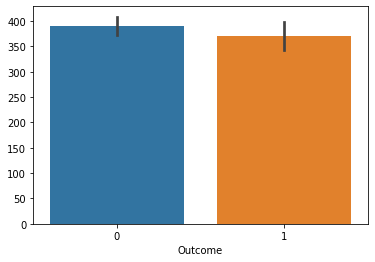

In [60]:
sns.barplot(x="Outcome",y=sdf.Outcome.index,data=sdf);

# Uçtan Uca Büyük Veride Makina Öğrenmesi

## Spark Session Ve Veri Seti

In [1]:
sc.stop()

NameError: name 'sc' is not defined

In [5]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark = SparkSession.builder \
    .master("local") \
    .appName("churn_modellemesi") \
    .config("spark.executer.memory","4gb") \
    .getOrCreate()

In [6]:
sc=spark.sparkContext
sc

<SparkContext master=local appName=churn_modellemesi>

In [7]:
spark_df = spark.read.csv("churn.csv",
                         header=True,
                         inferSchema=True,
                         sep = ",")

In [8]:
spark_df.cache()

DataFrame[_c0: int, Names: string, Age: double, Total_Purchase: double, Account_Manager: int, Years: double, Num_Sites: double, Churn: int]

In [9]:
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [10]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           Names| Age|Total_Purchase|Account_Manager|Years|Num_Sites|Churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [11]:
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [12]:
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [13]:
# df.columns=map(str.lower,df.columns)

In [14]:
spark_df = spark_df.withColumnRenamed("_c0","index")

In [15]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [16]:
spark_df.count()

900

In [17]:
len(spark_df.columns)

8

In [18]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [19]:
spark_df.distinct().count()

900

In [20]:
spark_df.select("names").distinct().count()

899

In [21]:
spark_df.groupby("names").count().sort("count",ascending=False).show()

+-------------------+-----+
|              names|count|
+-------------------+-----+
|      Jennifer Wood|    2|
|Christopher Johnson|    1|
|   Patrick Robinson|    1|
|      Chelsea Marsh|    1|
|        John Barber|    1|
|        Amber Evans|    1|
|      David Compton|    1|
|  Mr. Jerome Dawson|    1|
|         Lisa Davis|    1|
|      Maria Stanley|    1|
| Alexandra Phillips|    1|
|      Nicholas Levy|    1|
|     Richard Farmer|    1|
|      Linda Hubbard|    1|
|     Jesse Mitchell|    1|
|     Brittany Green|    1|
|   Timothy Johnston|    1|
|    Charles Whitney|    1|
|     Tony Schneider|    1|
|   Stefanie Miranda|    1|
+-------------------+-----+
only showing top 20 rows



In [22]:
spark_df.filter(spark_df.names=="Jennifer Wood").show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [24]:
spark_df.select("names").dropDuplicates().groupBy("names").count().sort("count",ascending=False).show()

+------------------+-----+
|             names|count|
+------------------+-----+
|      Patrick Bell|    1|
|  Patrick Robinson|    1|
|     Chelsea Marsh|    1|
|       John Barber|    1|
|       Amber Evans|    1|
|     David Compton|    1|
| Mr. Jerome Dawson|    1|
|        Lisa Davis|    1|
|     Maria Stanley|    1|
|Alexandra Phillips|    1|
|     Nicholas Levy|    1|
|    Richard Farmer|    1|
|     Linda Hubbard|    1|
|    Jesse Mitchell|    1|
|    Brittany Green|    1|
|  Timothy Johnston|    1|
|   Charles Whitney|    1|
|    Tony Schneider|    1|
|  Stefanie Miranda|    1|
|     Robert Joseph|    1|
+------------------+-----+
only showing top 20 rows



In [25]:
spark_df.where(spark_df.index==439).select("names").show()

+-------------+
|        names|
+-------------+
|Jennifer Wood|
+-------------+



In [26]:
jen = spark_df.where(spark_df.index==439).collect()[0]["names"]

In [27]:
jen

'Jennifer Wood'

In [28]:
dir(jen)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [35]:
spark_df.where(spark_df.index==439).collect()[0]["names"]

'Jennifer Wood'

## Keşifçi Veri Analizi

In [37]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [39]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [40]:
spark_df.filter(spark_df.age>47).count()

161

In [41]:
spark_df.filter(spark_df.total_purchase>18027).count()

0

In [47]:
spark_df.filter((spark_df.age<40) & (spark_df.years>5)).count()

187

In [48]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [50]:
spark_df.groupby("churn").agg({"total_purchase":"mean"}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [51]:
spark_df.groupby("churn").agg({"years":"mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [54]:
kor_data = spark_df.drop("index","names").toPandas()

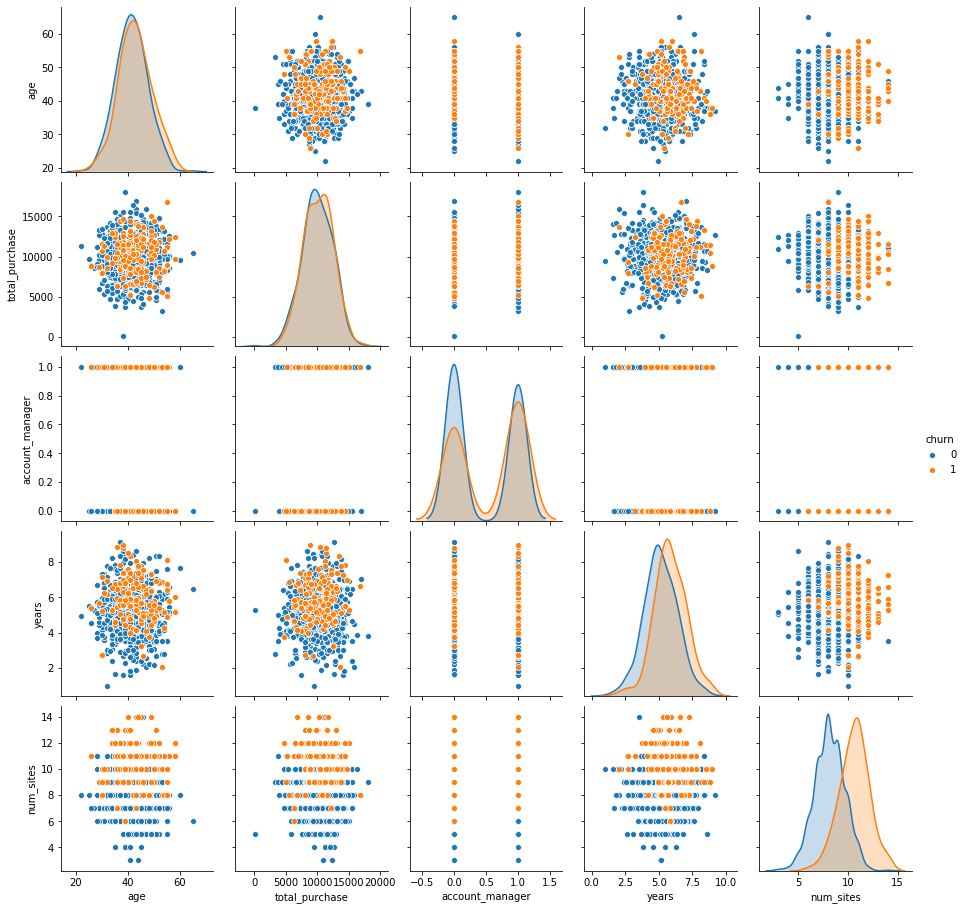

In [55]:
import seaborn as sns
sns.pairplot(kor_data,hue="churn");

 Değişkenler arasındaki ilişki çok bir korelasyon varmış gibi gözükmüyor ancak "churn" değişkenini boyut olarak ekleyerek durumu daha iyi gözlemleyebiliriz 

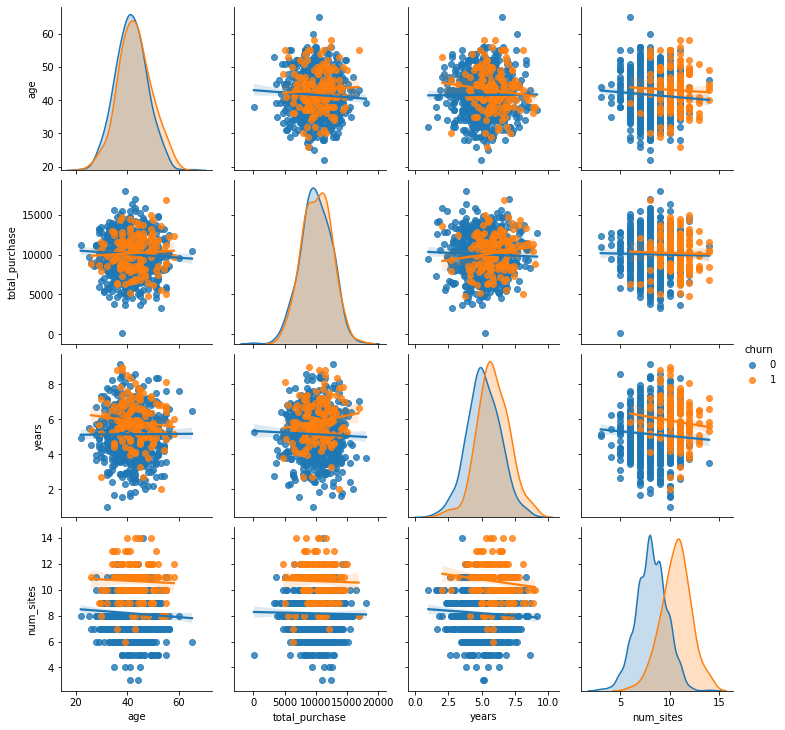

In [56]:
sns.pairplot(kor_data,vars=["age","total_purchase","years","num_sites"],
            hue="churn",
            kind="reg");

# Veri Ön İŞleme

In [57]:
spark_df=spark_df.dropna()

In [58]:
spark_df =spark_df.withColumn("age_kare",spark_df.age**2)

In [59]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 5 rows



In [62]:
from pyspark.ml.feature import StringIndexer

stringIndexer=StringIndexer(inputCol="churn",outputCol="label")

In [64]:
?stringIndexer

Type:           StringIndexer
String form:    StringIndexer_3b5055b4465c
File:           c:\spark\python\pyspark\ml\feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
StringIndexerModel...
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed).collect()]),
...     key=lambda x: x[0])
[(0, 0.0), (1, 2.0), (2, 1.0

In [65]:
indexed = stringIndexer.fit(spark_df).transform(spark_df)

In [66]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [67]:
spark_df=indexed.withColumn("label",indexed["label"].cast("integer"))

In [68]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

## Bağımsız Değişkenlerin ayarlanması

In [69]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [71]:
bag = ['age','total_purchase','years','num_sites',"account_manager"]

In [72]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler=VectorAssembler(inputCols=bag,outputCol="features")

In [73]:
va_df = vectorAssembler.transform(spark_df)

In [74]:
final_df = va_df.select(["features","label"])

In [78]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,7.2...|    1|
|[41.0,11916.22,6....|    1|
|[38.0,12884.75,6....|    1|
|[42.0,8010.76,6.7...|    1|
|[37.0,9191.58,5.5...|    1|
|[48.0,10356.02,5....|    1|
|[44.0,11331.58,5....|    1|
|[32.0,9885.12,6.9...|    1|
|[43.0,14062.6,5.4...|    1|
|[40.0,8066.94,7.1...|    1|
|[30.0,11575.37,5....|    1|
|[45.0,8771.02,6.6...|    1|
|[45.0,8988.67,4.8...|    1|
|[40.0,8283.32,5.1...|    1|
|[41.0,6569.87,4.3...|    1|
|[38.0,10494.82,6....|    1|
|[45.0,8213.41,7.3...|    1|
|[43.0,11226.88,8....|    1|
|[53.0,5515.09,6.8...|    1|
|[46.0,8046.4,5.69...|    1|
+--------------------+-----+
only showing top 20 rows



## test_train

In [79]:
splits=final_df.randomSplit([0.7,0.3])

In [81]:
train_df=splits[0]
test_df=splits[1]

In [82]:
train_df

DataFrame[features: vector, label: int]

In [83]:
test_df

DataFrame[features: vector, label: int]

## GBM ile Müşteri Terk Modellemesi

In [84]:
from pyspark.ml.classification import GBTClassifier

In [88]:
gbm = GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")

In [89]:
gbm_model = gbm.fit(train_df)

In [90]:
y_pred = gbm_model.transform(test_df)

In [91]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [92]:
ac = y_pred.select("label","prediction")

In [93]:
ac.filter(ac.label==ac.prediction).count()/ac.count()

0.8812949640287769

In [94]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

evaluator=BinaryClassificationEvaluator()

paramGrid=(ParamGridBuilder()
          .addGrid(gbm.maxDepth,[2,4,6])
          .addGrid(gbm.maxBins,[20,30])
          .addGrid(gbm.maxIter,[10,20])
          .build())

cv=CrossValidator(estimator=gbm,estimatorParamMaps=paramGrid,evaluator=evaluator,numFolds=10)

In [95]:
cv_model=cv.fit(train_df)

In [96]:
y_pred=cv_model.transform(test_df)

ac=y_pred.select("label","prediction")

ac.filter(ac.label==ac.prediction).count() / ac.count()

0.9028776978417267

In [97]:
evaluator.evaluate(y_pred)

0.9078206962327134

## Bu müşteriler bizi terk eder mi(yeni gelecek olan)?

In [111]:
import pandas as pd
names=pd.Series(["Ali Ahmetoğlu","Berkcan Tanerbey","Harika Gündüz","Polat Alemdar","Atıl Samancıoğlu"])
ages = pd.Series([38,43,34,50,40])
total_purchases = pd.Series([30000,10000,6000,3000,100000])
account_manager=pd.Series([1,0,0,1,1])
years=pd.Series([20,10,3,8,30])
num_sites=pd.Series([30,8,8,6,50])

yeni_musteriler = pd.DataFrame({
    "names":names,
    "age":ages,
    "total_purchase":total_purchases,
    "account_manager":account_manager,
    "years":years,
    "num_sites":num_sites
})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [112]:
yeni_musteriler

,names,age,total_purchase,account_manager,years,num_sites
0,Ali Ahmetoğlu,38,30000,1,20,30
1,Berkcan Tanerbey,43,10000,0,10,8
2,Harika Gündüz,34,6000,0,3,8
3,Polat Alemdar,50,3000,1,8,6
4,Atıl Samancıoğlu,40,100000,1,30,50


In [113]:
yeni_sdf =spark.createDataFrame(yeni_musteriler)

In [114]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [115]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|         30000|              1|   20|       30|
|Berkcan Tanerbey| 43|         10000|              0|   10|        8|
|   Harika Gündüz| 34|          6000|              0|    3|        8|
|   Polat Alemdar| 50|          3000|              1|    8|        6|
|Atıl Samancıoğlu| 40|        100000|              1|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [117]:
yeni_musteriler =vectorAssembler.transform(yeni_sdf)

In [118]:
yeni_musteriler

DataFrame[names: string, age: bigint, total_purchase: bigint, account_manager: bigint, years: bigint, num_sites: bigint, features: vector]

In [119]:
sonuclar=cv_model.transform(yeni_musteriler)

In [120]:
sonuclar.select("names","prediction").show()

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Atıl Samancıoğlu|       1.0|
+----------------+----------+

